# Import Library and Dependencies

In [ ]:
!pip install nltk
!pip3 install flair

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
!pip install wordcloud

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [5]:
import pandas as pd
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

# Import Data

In [6]:
data1 = pd.read_csv('tweet_kaggle.csv')
data2 = pd.read_csv('tweets_crawl_new.csv')

In [31]:
data_file = data1

# Pre Processing

In [32]:
data_file = data_file.drop_duplicates('twitcontent')

In [33]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   twitid            1100 non-null   int64 
 1   twitcontent       1100 non-null   object
 2   username          1100 non-null   object
 3   tokenized         1100 non-null   object
 4   No_stopwords      1100 non-null   object
 5   stemmed_porter    1100 non-null   object
 6   stemmed_snowball  1100 non-null   object
 7   lemmatized        1100 non-null   object
dtypes: int64(1), object(7)
memory usage: 77.3+ KB


In [34]:
import re
import string

In [35]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data_file['twitcontent'] = data_file['twitcontent'].apply(lambda x:clean_text(x))

In [36]:
df=pd.DataFrame()
data_file['twitcontent']=data_file['twitcontent']
def tokenization(text):
    text = re.split('\W+', text)
    return text

data_file['tokenized'] = data_file['twitcontent'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data_file['No_stopwords'] = data_file['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

data_file['stemmed_porter'] = data_file['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
data_file['stemmed_snowball'] = data_file['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data_file['lemmatized'] = data_file['No_stopwords'].apply(lambda x: lemmatizer(x))

# Pre-trained using Flair

In [37]:
import flair

In [38]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-12-01 09:43:46,070 loading file C:\Users\AULIA ASUSK401L\.flair\models\sentiment-en-mix-distillbert_4.pt


In [39]:
sentiment = []
confidence = []

for sentence in data_file['twitcontent']:
    if sentence == "":
        sentiment.append("")
        confidence.append("")
    
    else:
        sample = flair.data.Sentence(sentence)
        sentiment_model.predict(sample)
        
        sentiment.append(sample.labels[0].value)
        confidence.append(sample.labels[0].score)

In [40]:
data_file['sentiment'] = sentiment
data_file['confidence'] = confidence

In [41]:
data1 = data_file

# Cleaned Data

In [42]:
data1.head(2)

,twitid,twitcontent,username,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized,sentiment,confidence
0,1467810369,switchfoot httptwitpiccom2y1zl awww thats a b...,_TheSpecialOne_,"[switchfoot, httptwitpiccom2y1zl, awww, thats,...","[switchfoot, httptwitpiccom2y1zl, awww, thats,...","[switchfoot, httptwitpiccom2y1zl, awww, that, ...","[switchfoot, httptwitpiccom2y1zl, awww, that, ...","[switchfoot, httptwitpiccom2y1zl, awww, thats,...",NEGATIVE,0.996120
1,1467810672,is upset that he cant update his facebook by t...,scotthamilton,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might...","[upset, cant, updat, facebook, text, might, cr...","[upset, cant, updat, facebook, text, might, cr...","[upset, cant, update, facebook, texting, might...",NEGATIVE,0.996055


In [43]:
data2.head(2)

,twitid,twitcontent,username,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized,sentiment,confidence
0,1597692982693888001,as the world watches the worldcup the islamic ...,AlinejadMasih,"[as, the, world, watches, the, worldcup, the, ...","[world, watches, worldcup, islamic, republic, ...","[world, watch, worldcup, islam, republ, iran, ...","[world, watch, worldcup, islam, republ, iran, ...","[world, watch, worldcup, islamic, republic, ir...",NEGATIVE,0.957921
1,1597690583291940864,a worldcup brace for marcus \n\nmufc httpstcoj...,ManUtd,"[a, worldcup, brace, for, marcus, mufc, httpst...","[worldcup, brace, marcus, mufc, httpstcojml2bc...","[worldcup, brace, marcu, mufc, httpstcojml2bca...","[worldcup, brace, marcus, mufc, httpstcojml2bc...","[worldcup, brace, marcus, mufc, httpstcojml2bc...",POSITIVE,0.997795


In [44]:
temp = data1.groupby('sentiment').count()['twitcontent'].reset_index().sort_values(by='twitcontent',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,twitcontent
0,NEGATIVE,802
1,POSITIVE,298


In [45]:
temp = data2.groupby('sentiment').count()['twitcontent'].reset_index().sort_values(by='twitcontent',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,twitcontent
1,POSITIVE,596
0,NEGATIVE,346


# Merge Data and Vectorizing

In [ ]:
data = data1.append(data2)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [102]:
vect = CountVectorizer(ngram_range=(1,2)).fit(data['twitcontent'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

In [104]:
X = data['twitcontent']
Y = data['sentiment']
X = vect.transform(X)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [106]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1633, 24580)
Size of y_train: (1633,)
Size of x_test: (409, 24580)
Size of y_test: (409,)


## Logistic Regretion

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 76.04%


In [109]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[196  35]
 [ 63 115]]


              precision    recall  f1-score   support

    NEGATIVE       0.76      0.85      0.80       231
    POSITIVE       0.77      0.65      0.70       178

    accuracy                           0.76       409
   macro avg       0.76      0.75      0.75       409
weighted avg       0.76      0.76      0.76       409



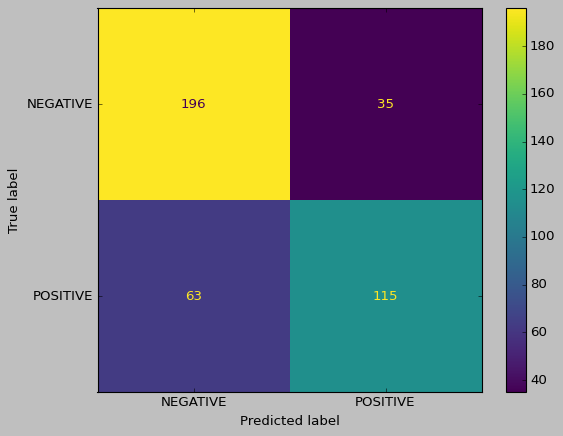

In [112]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Exploring Data 2

<AxesSubplot: ylabel='twitcontent'>

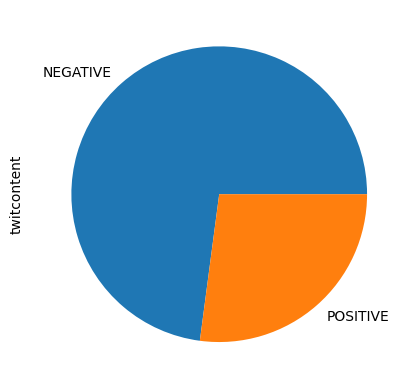

In [94]:
sentiment_count = data1.groupby('sentiment').count()['twitcontent']
sentiment_count.plot(kind='pie')

## Positive Tweets

In [63]:
pos_tweets = data2[data2.sentiment == 'POSITIVE']
pos_tweets = pos_tweets.sort_values(['confidence'], ascending= False)
pos_tweets.head(2)

,twitid,twitcontent,username,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized,sentiment,confidence
125,1597690563767455744,foosgonewild edgar is the goto haircut for w...,lisaderrickfin1,"[foosgonewild, edgar, is, the, goto, haircut, ...","[foosgonewild, edgar, goto, haircut, worldcup,...","[foosgonewild, edgar, goto, haircut, worldcup,...","[foosgonewild, edgar, goto, haircut, worldcup,...","[foosgonewild, edgar, goto, haircut, worldcup,...",POSITIVE,0.999892
881,1597689623320604673,the highest goal scoring team in this worldcup...,Gatman180,"[the, highest, goal, scoring, team, in, this, ...","[highest, goal, scoring, team, worldcup, thus,...","[highest, goal, score, team, worldcup, thu, fa...","[highest, goal, score, team, worldcup, thus, f...","[highest, goal, scoring, team, worldcup, thus,...",POSITIVE,0.999860


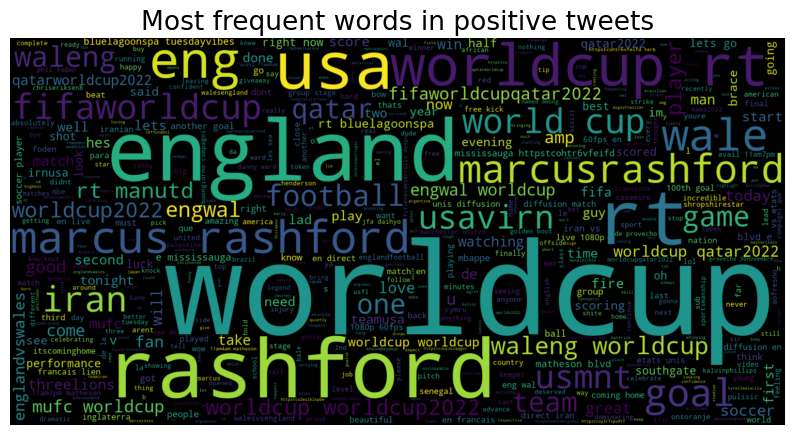

In [87]:
text = ' '.join([word for word in pos_tweets['twitcontent']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

## Negative Tweets

In [67]:
neg_tweets = data2[data2.sentiment == 'NEGATIVE']
neg_tweets = neg_tweets.sort_values(['confidence'], ascending= False)
neg_tweets.head(2)

,twitid,twitcontent,username,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized,sentiment,confidence
1312,1597689118741659648,23 looked like he had a compound fractured leg...,EL_Load,"[23, looked, like, he, had, a, compound, fract...","[23, looked, like, compound, fractured, leg, w...","[23, look, like, compound, fractur, leg, way, ...","[23, look, like, compound, fractur, leg, way, ...","[23, looked, like, compound, fractured, leg, w...",NEGATIVE,0.999969
599,1597690077546950657,wales are not just terrible there just so shit...,tnaved,"[wales, are, not, just, terrible, there, just,...","[wales, terrible, shit, theyve, played, poorly...","[wale, terribl, shit, theyv, play, poorli, thr...","[wale, terribl, shit, theyv, play, poor, throu...","[wale, terrible, shit, theyve, played, poorly,...",NEGATIVE,0.999967


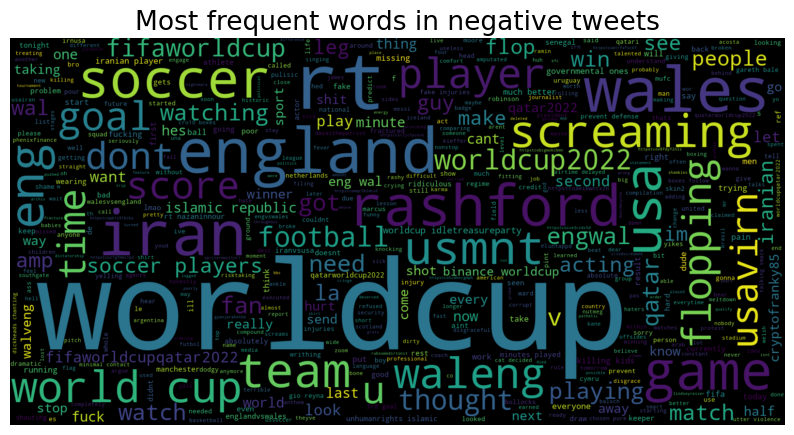

In [88]:
text = ' '.join([word for word in neg_tweets['twitcontent']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()